# Question 3

#### map image 1 to forward view 

In [1]:
import numpy as np
import pandas as pd
import cv2
import math
import matplotlib.pyplot as plt

In [2]:
# import image
image1 = cv2.imread('images/1.jpg')
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)   # BGR -> RGB 
print (type(image1_rgb))

<class 'numpy.ndarray'>


In [3]:
# matching points

reference_points = np.array([
    [63, 46, 1],
    [316,191, 1],
    [80, 746, 1],
    [317, 601, 1]
])

target_points = np.array([
    [100, 100, 1],
    [450, 100, 1],
    [100, 450, 1],
    [450, 450, 1]
])

In [4]:
def skew_3(vector):
    return np.array([
        [0, -1 * vector[2], vector[1]],
        [vector[2], 0, -1 * vector[0]],
        [-1 * vector[1], vector[0], 0]
    ])

In [5]:
# find homography matrix using 4 point algorithm
def calc_homography(points_ref, point_target):
    # find kronecker product
    x = []
    for i in range(len(point_target)):
        skew = skew_3(point_target[i])
        for j in range(3):
            a = np.matmul(
                np.transpose([skew[j]]),
                [points_ref[i]]
            )
            x.append(a.reshape(a.shape[0] * a.shape[1]))
    x = np.array(x)
    
    # compute svd decomposition of x
    u, s, vh = np.linalg.svd(x)
    
    # find our essential matrix elements
    h = vh[-1]
    return h.reshape(points_ref[0].shape[0], points_ref[0].shape[0])

In [6]:
# normalize homography matrix
def normalize_homography(h):
    u, s, vh = np.linalg.svd(h)
    return h / s[1];

In [7]:
# find posible solution
def find_solution(h):
    x = np.matmul(
        np.transposens(h), h
    )
    u, s, vh = np.linalg.svd(x)
    v1 = u[:,0]
    v2 = u[:,1]
    vh3 = u[:,2]
    u1 = (math.sqrt(1 - s[2] * s[2]) * v1 + math.sqrt(s[0] * s[0] - 1) * v3)/(math.sqrt(s[0] * s[0] - s[2] * s[2]))
    u2 = (math.sqrt(1 - s[2] * s[2]) * v1 - math.sqrt(s[0] * s[0] - 1) * v3)/(math.sqrt(s[0] * s[0] - s[2] * s[2]))
    U1 = np.concatenate(v2, u1, np.matmul(skew_3(v2), u1), axis = 1)
    U2 = np.concatenate(v2, u2, np.matmul(skew_3(v2), u2), axis = 1)
    W1 = np.concatenate(
        np.matmul(h, v2),
        np.matmul(h, u1),
        np.matmul(skew_3(np.matmul(h,v2)), np.matmul(h, u1)),
        axis = 1
    )
    W2 = np.concatenate(
        np.matmul(h, v2),
        np.matmul(h, u2),
        np.matmul(skew_3(np.matmul(h,v2)), np.matmul(h, u2)),
        axis = 1
    )
    
    N1 = np.matmul(skew_3(v2), u1)
    R1 = np.matmul(W1, np.transpose(U1))
    T1 = np.matmul((h - R1), N1)
    if (N1 > 0).all():
        return (
            R1,
            N1,
            T1
        )
    else:
        return (
            R1,
            -1 * N1,
            -1 * T1
        )
    

In [8]:
h = calc_homography(reference_points, target_points)
h = normalize_homography(h)

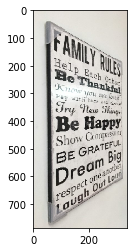

In [9]:
# show main image
plt.imshow(image1_rgb);

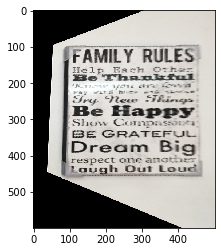

In [10]:
# transform image
transformed_img = cv2.warpPerspective(image1, h, (500, 600))
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))

In [11]:
# project image 2 to LCD video wall
# import image 2
image2 = cv2.imread('images/2.jpg')
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)   # BGR -> RGB 
print (type(image2_rgb))

<class 'numpy.ndarray'>


In [12]:
# import image 3
image3 = cv2.imread('images/3.jpg')
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)   # BGR -> RGB 
print (type(image3_rgb))

<class 'numpy.ndarray'>


In [13]:
# matching points

reference_points = np.array([
    [0, 0, 1],
    [961, 0, 1],
    [0, 538, 1],
    [961, 538, 1]
])

target_points = np.array([
    [241, 241, 1],
    [1175, 173, 1],
    [241, 481, 1],
    [1177, 518, 1]
])

In [14]:
h = calc_homography(reference_points, target_points)
h = normalize_homography(h)

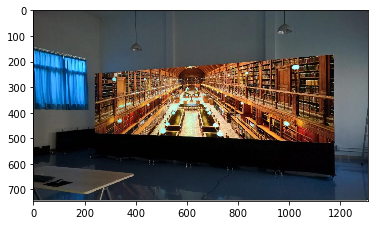

In [15]:
# show main image
plt.imshow(image3_rgb);

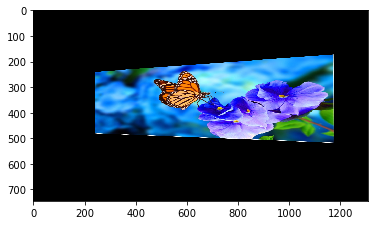

In [16]:
# transform image
transformed_img = cv2.warpPerspective(image2, h, (1309, 745))
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))

In [17]:
# put image transform to image 3
transformed_img_np = cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB)
image3_rgb[transformed_img_np != 0] = 0

final_image = image3_rgb + transformed_img_np

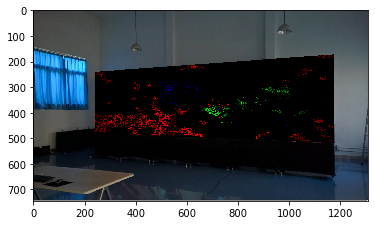

In [18]:
plt.imshow(image3_rgb)

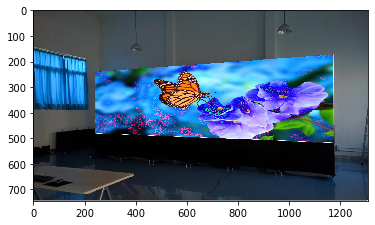

In [19]:
plt.imshow(final_image)

# Question 4

## Part a

import images

In [20]:
view1 = cv2.imread('images/view1.jpg')
view1_rgb = cv2.cvtColor(view1, cv2.COLOR_BGR2RGB)   # BGR -> RGB 
print (type(view1_rgb))

view2 = cv2.imread('images/view2.jpg')
view2_rgb = cv2.cvtColor(view2, cv2.COLOR_BGR2RGB)   # BGR -> RGB 
print (type(view2_rgb))

view3 = cv2.imread('images/view3.jpg')
view3_rgb = cv2.cvtColor(view3, cv2.COLOR_BGR2RGB)   # BGR -> RGB 
print (type(view3_rgb))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Find essential matrix for view 1 to view 2 using 8 point algorithm

In [21]:
view1_points = np.array([
    [240, 80, 1],
    [460, 34, 1],
    [239, 280, 1],
    [459, 327, 1],
    [48, 285, 1],
    [163, 328, 1],
    [328, 292, 1],
    [161, 342, 1]
])

view2_points = np.array([
    [153, 32, 1],
    [627, 32, 1],
    [150, 327, 1],
    [628, 321, 1],
    [70, 373, 1],
    [713, 373, 1],
    [390, 315, 1],
    [718, 390, 1]
])

view3_points = np.array([
    [22, 8, 1],
    [239, 52, 1],
    [22, 297, 1],
    [241, 248, 1],
    [323, 296, 1],
    [437, 253, 1],
    [154, 261, 1],
    [443, 259, 1]
])

In [22]:
def calc_essential_matrix(points_ref, point_target):
    # find kronecker product
    x = []
    for i in range(len(points_ref)):
        a = np.matmul(
            np.transpose([point_target[i]]),
            [points_ref[i]]
        )
        x.append(a.reshape(a.shape[0] * a.shape[1]))
    x = np.array(x)
    
    # compute svd decomposition of x
    u, s, vh = np.linalg.svd(x)
    
    # find our essential matrix elements
    e = vh[-1]
    return e.reshape(points_ref[0].shape[0], points_ref[0].shape[0])

In [23]:
def project_to_essential_space(essential_matrix):
    # use Frobenius distance
    u, s, vh = np.linalg.svd(essential_matrix)
    theta = (s[0] + s[1]) / 2
    return np.matmul(
        np.matmul(
            u, np.array([[s[0], 0, 0], [0, s[1], 0], [0, 0, 0]])
        ), vh
    )

In [24]:
e1_2 = calc_essential_matrix(view1_points, view2_points)
e1_2_normal = project_to_essential_space(e1_2)
print(e1_2_normal)

[[ 8.13467151e-07 -9.75580550e-06  2.54427741e-03]
 [ 1.50315393e-05  1.65896255e-05 -9.51000909e-03]
 [-5.73990866e-03  2.83019365e-03  9.99931062e-01]]


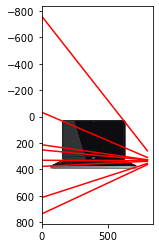

In [25]:
# draw epilines
plt.imshow(view2_rgb)
for i in range(len(view1_points)):
    t = np.matmul(e1_2_normal, np.transpose([view1_points[i]]))
    x = np.linspace(0,800,100)
    y = (-t[2] -x * t[0])/ t[1]
    plt.plot(x, y, '-r')

### Find essential matrix for view 2 to view 3 using 8 point algorithm

In [26]:
e2_3 = calc_essential_matrix(view2_points, view3_points)
e2_3_normal = project_to_essential_space(e2_3) 
print(e2_3_normal)

[[-6.03182805e-06  1.12408997e-04 -2.96354648e-02]
 [-1.30515262e-05 -3.38549071e-05  7.66087016e-02]
 [ 6.98435993e-03 -6.45564021e-02  9.94503153e-01]]


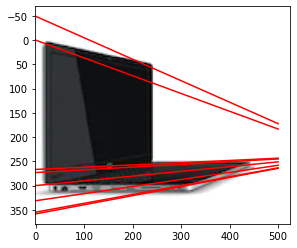

In [27]:
# draw epilines
plt.imshow(view3_rgb)
for i in range(len(view2_points)):
    t = np.matmul(e2_3_normal, np.transpose([view2_points[i]]))
    x = np.linspace(0,500,100)
    y = (-t[2] -x * t[0])/ t[1]
    plt.plot(x, y, '-r')

### Find essential matrix for view 2 to view 3 using 8 point algorithm

In [28]:
e1_3 = calc_essential_matrix(view1_points, view3_points)
e1_3_normal = project_to_essential_space(e1_3)
print(e1_3_normal)

[[ 9.08413765e-07 -1.51020089e-05  4.11642353e-03]
 [ 1.26716613e-05  2.99339992e-05 -1.03161166e-02]
 [-3.77532993e-03 -1.55315479e-03  9.99929981e-01]]


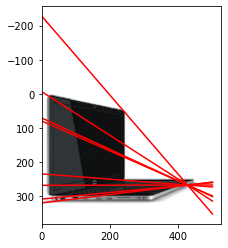

In [29]:
# draw epilines
plt.imshow(view3_rgb)
for i in range(len(view1_points)):
    t = np.matmul(e1_3_normal, np.transpose([view1_points[i]]))
    x = np.linspace(0,500,100)
    y = (-t[2] -x * t[0])/ t[1]
    plt.plot(x, y, '-r')

## Part b

In [30]:
def decompose_essential_matrix(essential_matrix):
    u, s, vh = np.linalg.svd(essential_matrix)
    
    rotation1 = np.matmul(
        np.matmul(
            u, np.array([[0, 1, 0], [0, -1, 0], [0, 0, 1]])
        ),vh
    )
    
    rotation2 = np.matmul(
        np.matmul(
            u, np.array([[0, -1, 0], [0, 1, 0], [0, 0, 1]])
        ),vh
    )
    
    translation1 = np.matmul(
        np.matmul(
            u, np.array([[0, -1, 0], [0, 1, 0], [0, 0, 1]])
        ), 
        np.matmul(
            np.array([[s[0], 0, 0], [0, s[1], 0], [0, 0, s[2]]]), np.transpose(u)
        )
    )
    translation1 = np.array([[translation1[2][1]],[-translation1[2][0]],[translation1[1][0]]])
    
    translation2 = np.matmul(
        np.matmul(
            u, np.array([[0, 1, 0], [0, -1, 0], [0, 0, 1]])
        ), 
        np.matmul(
            np.array([[s[0], 0, 0], [0, s[1], 0], [0, 0, s[2]]]), np.transpose(u)
        )
    )
    translation2 = np.array([[translation2[2][1]],[-translation2[2][0]],[translation2[1][0]]])

    return [[translation1, translation2], [rotation1, rotation2]]

### calculate translation and rotation matrix view 1 to view 3

In [31]:
dec = decompose_essential_matrix(e1_3_normal)
print("Solution 1 : ")
print("translation matrix : ")
print(dec[0][0])
print("rotation matrix : ")
print(dec[1][0])

print("\n\n---------------------\n\n")
print("Solution 2 : ")
print("translation matrix : ")
print(dec[0][1])
print("rotation matrix : ")
print(dec[1][1])

Solution 1 : 
translation matrix : 
[[ 3.00514841e-05]
 [ 1.88136513e-05]
 [-1.55820735e-05]]
rotation matrix : 
[[-0.06875952  0.99544065  0.00128678]
 [ 0.98819511  0.07725776  0.0038507 ]
 [ 0.89433352 -0.4711855   0.00264438]]


---------------------


Solution 2 : 
translation matrix : 
[[-3.00514841e-05]
 [-1.88136513e-05]
 [ 1.55820735e-05]]
rotation matrix : 
[[ 8.61863541e-01  5.02798745e-01  4.03482421e-03]
 [-4.91698405e-01  8.60665776e-01 -5.19291964e-04]
 [-8.92476221e-01  4.74694089e-01 -2.63191559e-03]]


In [32]:
dec = decompose_essential_matrix(project_to_essential_space(np.matmul(e2_3, e1_2)))
print("Solution 1 : ")
print("translation matrix : ")
print(dec[0][0])
print("rotation matrix : ")
print(dec[1][0])

print("\n\n---------------------\n\n")
print("Solution 2 : ")
print("translation matrix : ")
print(dec[0][1])
print("rotation matrix : ")
print(dec[1][1])

Solution 1 : 
translation matrix : 
[[ 2.75052049e-07]
 [ 1.00866694e-07]
 [-1.11682123e-07]]
rotation matrix : 
[[ 4.43587224e-01  9.07523537e-01 -2.08464195e-05]
 [ 9.36010092e-01 -5.17120810e-01  6.83263769e-03]
 [ 6.16343815e-01 -6.75386214e-01  5.44599575e-03]]


---------------------


Solution 2 : 
translation matrix : 
[[-2.75052049e-07]
 [-1.00866694e-07]
 [ 1.11682123e-07]]
rotation matrix : 
[[ 0.94531845  0.35598048  0.00441738]
 [-0.4264846   0.98064221 -0.00521975]
 [-0.61420528  0.67733167 -0.00543923]]


Using essential matrix to project view 1 to view 3 directly, is almost similar to using essential matrix to project view 1 to view 2, and then project view 2 to view 3

## Part C

### Find essential matrix for view 1 to view 2 using python library

In [33]:
e1_2_cv = cv2.findEssentialMat(view1_points[:, :2], view2_points[:,:2])
e1_2_cv[0]

array([[-7.41941355e-05,  5.91640240e-04, -1.35037417e-01],
       [-3.83676704e-04, -6.86245128e-04,  6.94092318e-01],
       [ 2.18487275e-01, -6.72504782e-01, -6.36119046e-04]])

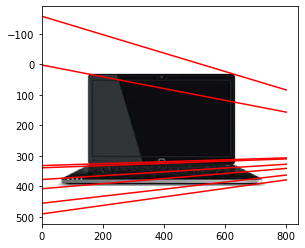

In [34]:
# draw epilines
plt.imshow(view2_rgb)
for i in range(len(view1_points)):
    t = np.matmul(e1_2_cv[0], np.transpose([view1_points[i]]))
    x = np.linspace(0,800,100)
    y = (-t[2] -x * t[0])/ t[1]
    plt.plot(x, y, '-r')

### Find essential matrix for view 2 to view 3 using python library

In [35]:
e2_3_cv = cv2.findEssentialMat(view2_points[:, :2], view3_points[:,:2])
e2_3_cv[0]

array([[ 1.71629702e-04, -1.36920459e-03,  3.61582650e-01],
       [ 3.42106696e-04, -3.48202300e-04, -6.07665849e-01],
       [-1.63723503e-01,  6.87889932e-01,  3.42270248e-04]])

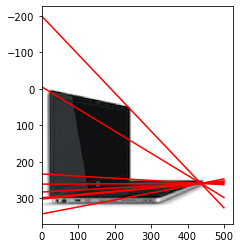

In [36]:
# draw epilines
plt.imshow(view3_rgb)
for i in range(len(view2_points)):
    t = np.matmul(e2_3_cv[0], np.transpose([view2_points[i]]))
    x = np.linspace(0,500,50)
    y = (-t[2] -x * t[0])/ t[1]
    plt.plot(x, y, '-r')

### Find essential matrix for view 1 to view 3 using python library

In [37]:
e1_3_cv = cv2.findEssentialMat(view1_points[:, :2], view3_points[:,:2])
e1_3_cv[0]

array([[ 5.13644336e-04, -1.76390465e-03,  3.10776969e-01],
       [-6.84681550e-05,  7.52554531e-04, -6.35149972e-01],
       [-2.30027291e-01,  6.68643058e-01,  1.46573364e-03]])

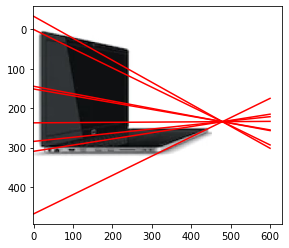

In [38]:
# draw epilines
plt.imshow(view3_rgb)
for i in range(len(view3_points)):
    t = np.matmul(e1_3_cv[0], np.transpose([view3_points[i]]))
    x = np.linspace(0,600,100)
    y = (-t[2] -x * t[0])/ t[1]
    plt.plot(x, y, '-r')

The difference between part one and part c is because of projection and minimizing the ||E - F||
in part a forbious distance estimation was used, however opencv uses more complicated methods

## Part d

In [39]:
dec = decompose_essential_matrix(e1_3_cv[0])
print("Solution 1 : ")
print("translation matrix : ")
print(dec[0][0])
print("rotation matrix : ")
print(dec[1][0])

print("\n\n---------------------\n\n")
print("Solution 2 : ")
print("translation matrix : ")
print(dec[0][1])
print("rotation matrix : ")
print(dec[1][1])

Solution 1 : 
translation matrix : 
[[ 0.63435562]
 [ 0.31038951]
 [-0.27924555]]
rotation matrix : 
[[ 8.49379446e-01  2.92588831e-01 -4.41485154e-01]
 [ 4.15602896e-01  1.42192804e-01  8.98660205e-01]
 [ 1.77293475e-03 -2.60479972e-04  9.98748846e-01]]


---------------------


Solution 2 : 
translation matrix : 
[[-0.63435562]
 [-0.31038951]
 [ 0.27924555]]
rotation matrix : 
[[ 0.84937945  0.29181888  0.44199446]
 [ 0.4156029   0.14375894 -0.898411  ]
 [ 0.00177293  0.00148033 -0.99874778]]


In [40]:
dec = decompose_essential_matrix(np.matmul(e2_3_cv[0], e1_2_cv[0]))
print("Solution 1 : ")
print("translation matrix : ")
print(dec[0][0])
print("rotation matrix : ")
print(dec[1][0])

print("\n\n---------------------\n\n")
print("Solution 2 : ")
print("translation matrix : ")
print(dec[0][1])
print("rotation matrix : ")
print(dec[1][1])

Solution 1 : 
translation matrix : 
[[0.00234829]
 [0.00254966]
 [0.00216491]]
rotation matrix : 
[[ 0.81852854  0.26315974 -0.50554199]
 [ 0.48428346  0.16200928  0.85510018]
 [ 0.00428597 -0.00411086 -1.00656654]]


---------------------


Solution 2 : 
translation matrix : 
[[-0.00234829]
 [-0.00254966]
 [-0.00216491]]
rotation matrix : 
[[ 8.16101312e-01  2.67906983e-01  5.06970634e-01]
 [ 4.88381169e-01  1.53994870e-01 -8.54250088e-01]
 [-5.39985363e-04  5.32787480e-03  1.00656982e+00]]


## Part e

### MSE of transformation 1-2

In [41]:
mse = (np.square(e1_2_normal - e1_2_cv[0])).mean()
mse

0.22460842463274647

### MSE of transformation 2-3

In [42]:
mse = (np.square(e2_3_normal - e2_3_cv[0])).mean()
mse

0.2449953607338875

### MSE of transformation 1-3

In [43]:
mse = (np.square(e2_3_normal - e2_3_cv[0])).mean()
mse

0.2449953607338875